# **Assignment 2**

### Mayur Mankar
### 20169
##### DSE412 - ML in Biopharma

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 35.4 MB/s eta 0:00:00


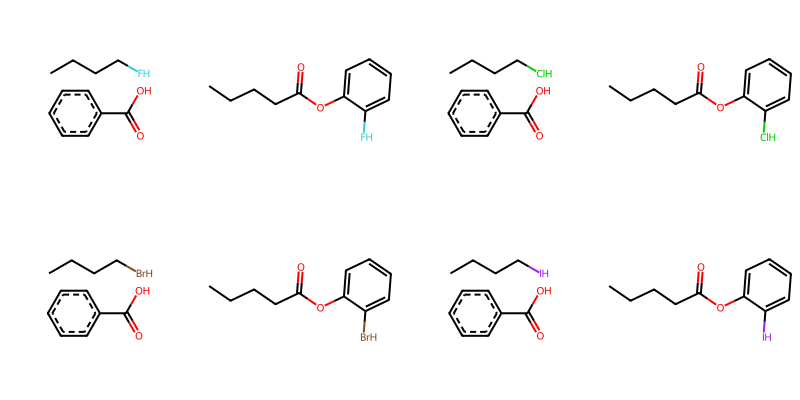

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from IPython.display import Image, display

# SMILES reprsentation target
target_smiles = "CCCCC(=O)OC1=CC=CC=C1C(=O)O"

substituents = ["F", "Cl", "Br", "I"]

generated_molecules = [
    mol
    for substituent in substituents
    for mol in Chem.ReplaceSubstructs(Chem.MolFromSmiles(target_smiles), Chem.MolFromSmiles("C(=O)O"), Chem.MolFromSmiles(substituent))
]

from IPython.display import Image, display

img = Draw.MolsToGridImage(generated_molecules, molsPerRow=4, subImgSize=(200, 200))
display(img)

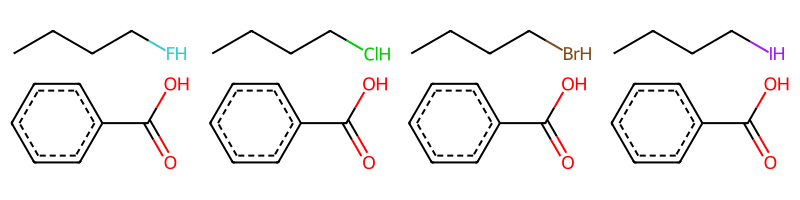

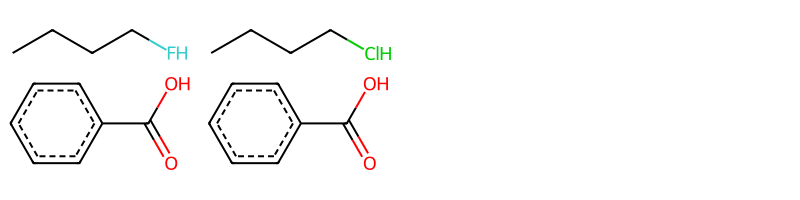

In [ ]:
# Solubility - Predictive AI

# Function to calculate logP for a molecule (Assignment 1)
def calculate_logp(molecule):
    return Descriptors.MolLogP(molecule)

# Generate molecules by replacing functional groups and evaluate them
generated_molecules = []
for substituent in substituents:
    molecule = Chem.MolFromSmiles(target_smiles)
    substituent_molecule = Chem.MolFromSmiles(substituent)

    molecule = Chem.ReplaceSubstructs(molecule, Chem.MolFromSmiles("C(=O)O"), substituent_molecule)[0]

    logp = calculate_logp(molecule)

    generated_molecules.append((molecule, logp))

selected_molecules = [mol for mol, logp in generated_molecules if 1 <= logp <= 3]

# generated molecules
img = Draw.MolsToGridImage([mol for mol, _ in generated_molecules], molsPerRow=4, subImgSize=(200, 200))
display(img)

# selected molecules
img_selected = Draw.MolsToGridImage(selected_molecules, molsPerRow=4, subImgSize=(200, 200))
display(img_selected)


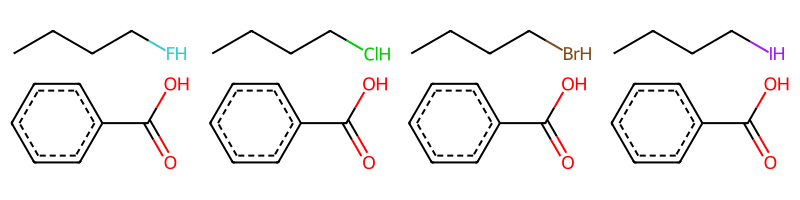

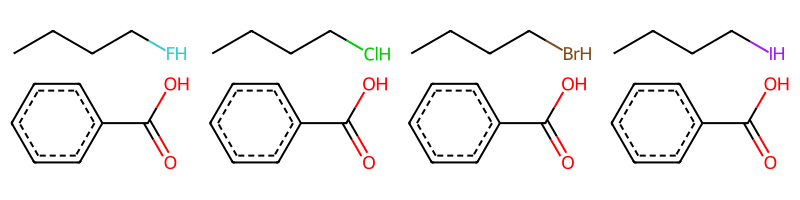

In [ ]:
#Bioactivity Prediction - Assignment 1

def predict_bioactivity(molecule):
    mol_weight = Descriptors.MolWt(molecule)
    logp = Descriptors.MolLogP(molecule)

    # assuming a linear relationship between descriptors and bioactivity
    bioactivity = 10 - (mol_weight / 100) + (logp * 2)

    return bioactivity

generated_molecules = []
for substituent in substituents:
    molecule = Chem.MolFromSmiles(target_smiles)
    substituent_molecule = Chem.MolFromSmiles(substituent)

    molecule = Chem.ReplaceSubstructs(molecule, Chem.MolFromSmiles("C(=O)O"), substituent_molecule)[0]

    # Predict bioactivity for the generated molecule
    bioactivity = predict_bioactivity(molecule)

    # Append the generated molecule and predicted bioactivity to the list
    generated_molecules.append((molecule, bioactivity))

# (Filter molecules based on bioactivity threshold (e.g., )bioactivity >= 5)
selected_molecules = [mol for mol, bioactivity in generated_molecules if bioactivity >= 5]

# generated molecules
img = Draw.MolsToGridImage([mol for mol, _ in generated_molecules], molsPerRow=4, subImgSize=(200, 200))
display(img)

# selected molecules
img_selected = Draw.MolsToGridImage(selected_molecules, molsPerRow=4, subImgSize=(200, 200))
display(img_selected)


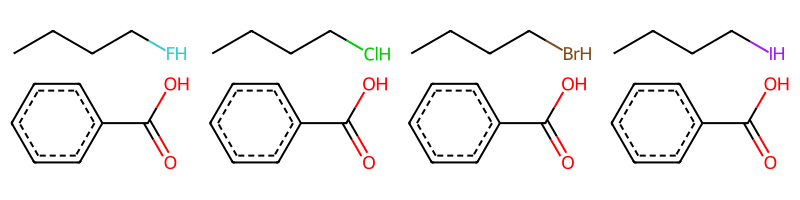

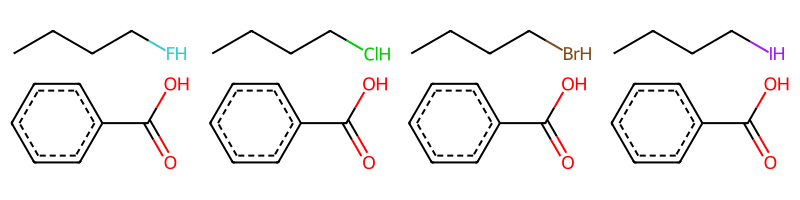

In [ ]:
# Toxicity Prediction - Assignment 1

def predict_toxicity(molecule):
    mol_weight = Descriptors.MolWt(molecule)
    logp = Descriptors.MolLogP(molecule)
    toxicity = (mol_weight / 100) + (logp * 2)
    return toxicity

generated_molecules = []
for substituent in substituents:
    molecule = Chem.MolFromSmiles(target_smiles)
    substituent_molecule = Chem.MolFromSmiles(substituent)
    molecule = Chem.ReplaceSubstructs(molecule, Chem.MolFromSmiles("C(=O)O"), substituent_molecule)[0]

    toxicity = predict_toxicity(molecule)

    generated_molecules.append((molecule, toxicity))

# (Toxicity >= 3)
selected_molecules = [mol for mol, toxicity in generated_molecules if toxicity >= 3]

# generated molecules
img = Draw.MolsToGridImage([mol for mol, _ in generated_molecules], molsPerRow=4, subImgSize=(200, 200))
display(img)

# selected molecules
img_selected = Draw.MolsToGridImage(selected_molecules, molsPerRow=4, subImgSize=(200, 200))
display(img_selected)
